### Deep Q-learning solution

$\epsilon$-greedy policy  
TD(0) update

Converged after 512 iterations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lunar_lander_dqn import DQN, create_env

Using TensorFlow backend.
C:\Users\n.ivantsiv\AppData\Local\Continuum\anaconda3\envs\rl_env_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\n.ivantsiv\AppData\Local\Continuum\anaconda3\envs\rl_env_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\n.ivantsiv\AppData\Local\Continuum\anaconda3\envs\rl_env_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(

In [2]:
loss1 = np.load(r'dqn_loss_400_initial.npy')
loss2 = np.load(r'dqn_loss_800.npy')

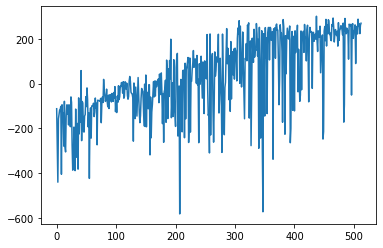

In [3]:
plt.plot(np.append(loss1, loss2))
plt.show()

In [ ]:
!cmd python evaluate_dqn.py "checkpoints\dqn_e112_completed.h5" 5